In [1]:
# data manipulation library
import pandas as pd
import numpy as np
#data visualization library
import matplotlib.pyplot as plt
import seaborn as sns
# ignore warning masseges library
import warnings 
warnings.filterwarnings('ignore')
#import logging
import logging
logging.basicConfig(level=logging.INFO,
                   format ='%(asctime)s - %(levelname)s - %(message)s',
                   filemode = 'w',
                   filename = 'model.log',force = True)

In [2]:
logging.info('IMPORT DATASET FOR MODEL BUILDING')

In [3]:
url = 'https://raw.githubusercontent.com/varunr1909/CementPrediction_Model/refs/heads/main/Concrete_Data.csv'

df = pd.read_csv(url)
df.sample(frac=1)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
821,322.0,0.0,0.0,203.0,0.0,974.0,800.0,14,20.77
485,387.0,20.0,94.0,157.0,14.3,938.0,845.0,28,50.24
23,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,180,44.21
529,359.0,19.0,141.0,154.0,10.9,942.0,801.0,56,68.75
854,287.0,121.0,94.0,188.0,9.0,904.0,696.0,28,41.94
...,...,...,...,...,...,...,...,...,...
104,318.8,212.5,0.0,155.7,14.3,852.1,880.4,7,33.40
117,313.3,262.2,0.0,175.5,8.6,1046.9,611.8,28,59.80
70,374.0,189.2,0.0,170.1,10.1,926.1,756.7,3,34.40
321,249.1,0.0,98.8,158.1,12.8,987.8,889.0,28,30.85


In [4]:
from collections import OrderedDict
stats=[]
for i in df.columns:
    numerical_stats =OrderedDict({
        'feature':i ,
        'min':df[i].min(),
        'max':df[i].max(),
        'mean':df[i].mean(),
        'median':df[i].quantile(0.50),
        'quantile(0.25)':df[i].quantile(0.25),
        'quantile(0.75)':df[i].quantile(0.75),
        'Standerd deviation':df[i].std(),                               
        'IQR':df[i].quantile(0.75)-df[i].quantile(0.25),
        'skewness':df[i].skew(),
        #skewness  : Spread of data
        'kurtosis':df[i].kurtosis()
        #kurtosis: show that spread of IQR
        })
    stats.append(numerical_stats)
    report = pd.DataFrame(stats)
    #saving all OrderedDict Dictionary into Data Frame : Structured Frame

report
#if your data having positive skewed or negative skeweed in that scenario never ever impute with mean


,feature,min,max,mean,median,quantile(0.25),quantile(0.75),Standerd deviation,IQR,skewness,kurtosis
0,Cement (component 1)(kg in a m^3 mixture),102.00,540.0,281.167864,272.900,192.375,350.000,104.506364,157.625,0.509481,-0.520652
1,Blast Furnace Slag (component 2)(kg in a m^3 m...,0.00,359.4,73.895825,22.000,0.000,142.950,86.279342,142.950,0.800717,-0.508175
2,Fly Ash (component 3)(kg in a m^3 mixture),0.00,200.1,54.188350,0.000,0.000,118.300,63.997004,118.300,0.537354,-1.328746
3,Water (component 4)(kg in a m^3 mixture),121.80,247.0,181.567282,185.000,164.900,192.000,21.354219,27.100,0.074628,0.122082
4,Superplasticizer (component 5)(kg in a m^3 mix...,0.00,32.2,6.204660,6.400,0.000,10.200,5.973841,10.200,0.907203,1.411269
5,Coarse Aggregate (component 6)(kg in a m^3 mi...,801.00,1145.0,972.918932,968.000,932.000,1029.400,77.753954,97.400,-0.040220,-0.599016
6,Fine Aggregate (component 7)(kg in a m^3 mixture),594.00,992.6,773.580485,779.500,730.950,824.000,80.175980,93.050,-0.253010,-0.102177
7,Age (day),1.00,365.0,45.662136,28.000,7.000,56.000,63.169912,49.000,3.269177,12.168989
8,"Concrete compressive strength(MPa, megapascals)",2.33,82.6,35.817961,34.445,23.710,46.135,16.705742,22.425,0.416977,-0.313725


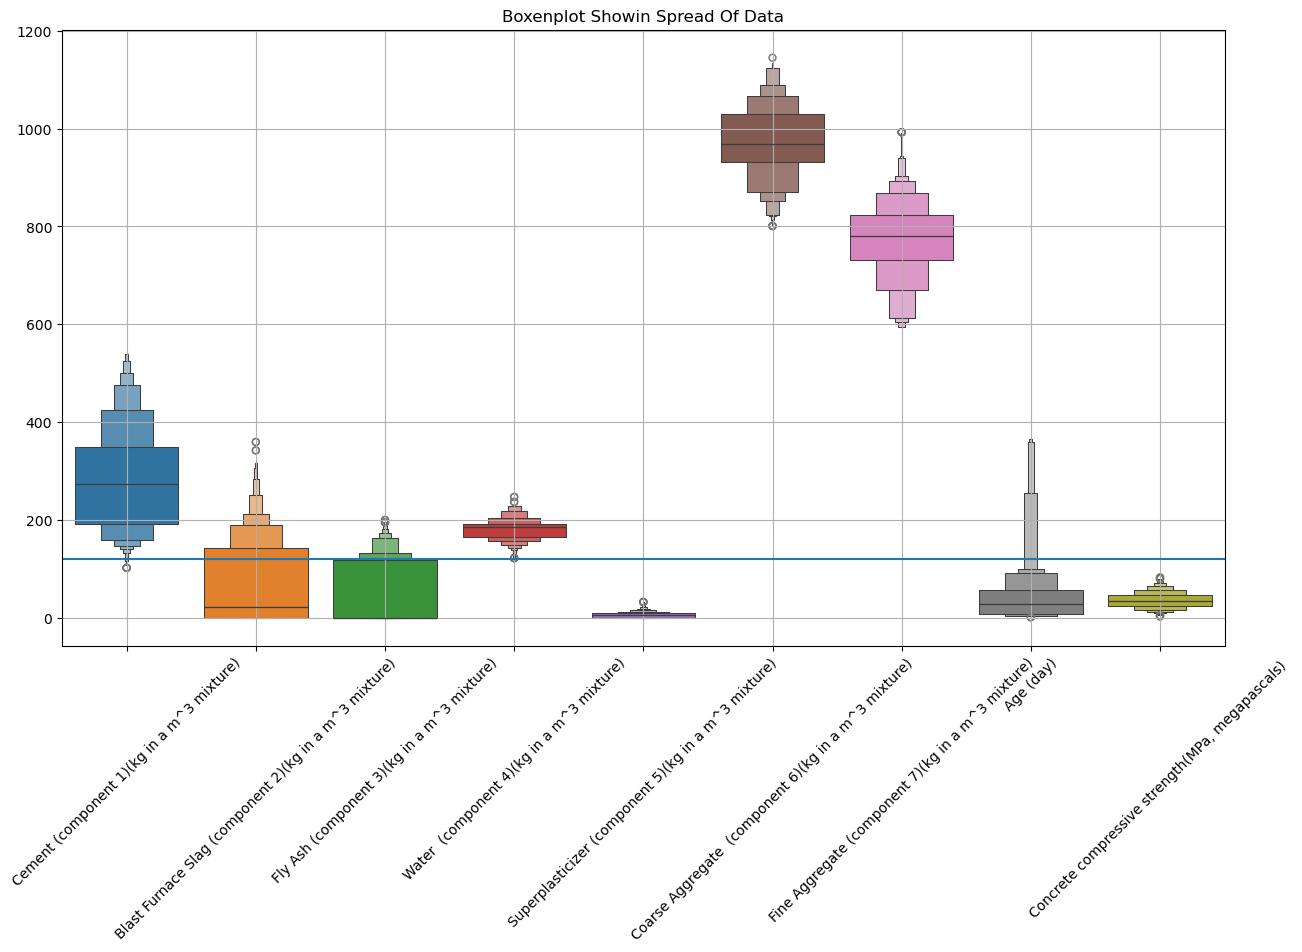

In [32]:
'''
Note:
1. Positive Kurtosis : Leptokurtic
2. Normal Kurtosis : Mesokurtic----------best
3. Negative Kurtosis : Platykurtic
* whenever kurtosis is 0.000 is mesokurtic
........................................................................................................
1. Positive Skewness : mode < median < mean
2. No Skewness : mean = median = mode
3. Negative Skewness = mean < median < mode
'''
plt.figure(figsize = (15,8))
sns.boxenplot(df)
plt.axhline(120)
plt.xticks(rotation = 45)
plt.title('Boxenplot Showin Spread Of Data')
plt.grid()
plt.show()

In [34]:
df.corr()
# correlation between columns
# negative sign denote inverse proportion

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
Cement (component 1)(kg in a m^3 mixture),1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag (component 2)(kg in a m^3 mixture),-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash (component 3)(kg in a m^3 mixture),-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water (component 4)(kg in a m^3 mixture),-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer (component 5)(kg in a m^3 mixture),0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate (component 6)(kg in a m^3 mixture),-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate (component 7)(kg in a m^3 mixture),-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age (day),0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
"Concrete compressive strength(MPa, megapascals)",0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


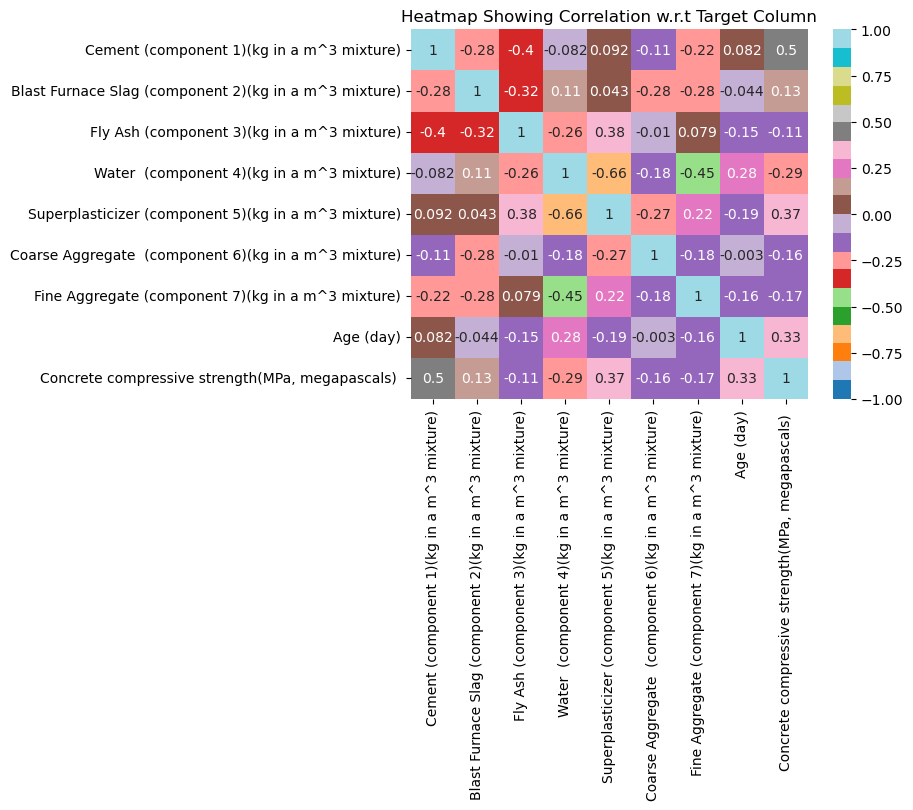

In [58]:
sns.heatmap(df.corr(),annot = True,center = 0 , vmax = 1 , vmin =-1, cmap = "tab20")
plt.title("Heatmap Showing Correlation w.r.t Target Column")
plt.show()

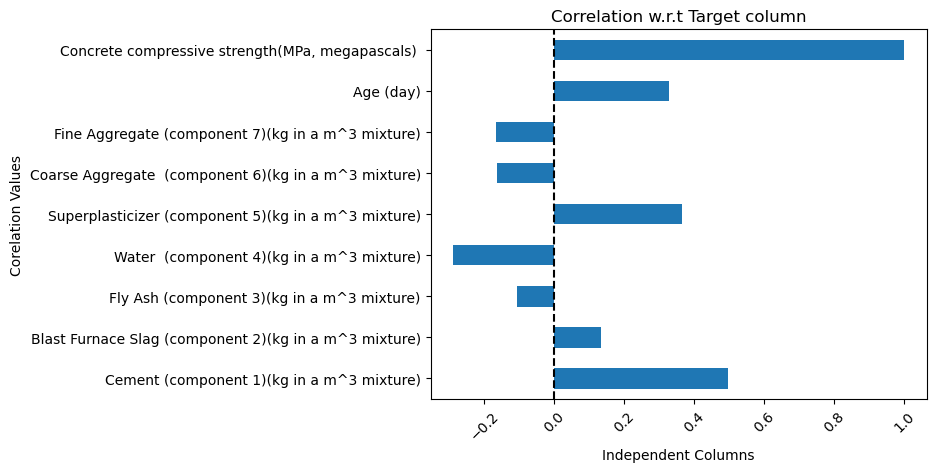

In [68]:
df.corr()['Concrete compressive strength(MPa, megapascals) '].plot(kind = 'barh')
plt.axvline(0,linestyle = '--',color= 'black')
plt.title('Correlation w.r.t Target column')
plt.ylabel('Corelation Values')
plt.xlabel('Independent Columns')
plt.xticks(rotation = 45)
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [8]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [9]:
import statsmodels.api as sm
#independent column
X = df.drop(columns='Concrete compressive strength(MPa, megapascals) ',axis = 1)
#dependent / target column
y = df['Concrete compressive strength(MPa, megapascals) ']

In [10]:
X = sm.add_constant(X)

In [11]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           OLS Regression Results                                           
============================================================================================================
Dep. Variable:     Concrete compressive strength(MPa, megapascals)    R-squared:                       0.616
Model:                                                          OLS   Adj. R-squared:                  0.613
Method:                                               Least Squares   F-statistic:                     204.3
Date:                                              Thu, 29 May 2025   Prob (F-statistic):          6.29e-206
Time:                                                      19:29:56   Log-Likelihood:                -3869.0
No. Observations:                                              1030   AIC:                             7756.
Df Residuals:                                                  1021   BIC:                             7800.
Df Model:                                                         8                                         
Covariance Type:                                          nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                   -23.3312     26.586     -0.878      0.380     -75.500      28.837
Cement (component 1)(kg in a m^3 mixture)                 0.1198      0.008     14.113      0.000       0.103       0.136
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     0.1039      0.010     10.247      0.000       0.084       0.124
Fly Ash (component 3)(kg in a m^3 mixture)                0.0879      0.013      6.988      0.000       0.063       0.113
Water  (component 4)(kg in a m^3 mixture)                -0.1499      0.040     -3.731      0.000      -0.229      -0.071
Superplasticizer (component 5)(kg in a m^3 mixture)       0.2922      0.093      3.128      0.002       0.109       0.476
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      0.0181      0.009      1.926      0.054      -0.000       0.037
Fine Aggregate (component 7)(kg in a m^3 mixture)         0.0202      0.011      1.887      0.059      -0.001       0.041
Age (day)                                                 0.1142      0.005     21.046      0.000       0.104       0.125
==============================================================================
Omnibus:                        5.378   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.304
Skew:                          -0.174   Prob(JB):                       0.0705
Kurtosis:                       3.045   Cond. No.                     1.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""